In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt

**Load** **the** **dataset**

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


# 1. **Preprocessing** **Techniques**.

**Missing** **Values**

In [6]:
# Handling Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


**Removing** **Missing** **Values**

In [7]:
df.dropna(inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
print (categorical_cols)

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')


**Label** **Encoding**

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
print(df.head())
print(df.info())

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')
   Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0  4215        12           2006.0     10        160     41.36     28.96   
2  2087        12           2008.0      6        160     15.68     12.76   
3  4217        12           2009.0     10        160     15.61     10.93   
6  2567         2           2006.0      4        160     11.28      9.14   
7  4213        12           2006.0      3        160     13.96      9.18   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0      3.77         8.45         82.53          76.0          51.0   
2      3.79         3.29         35.52          82.0          73.0   
3      3.28         2.95         32.77          80.0          73.0   
6      6.50         2.88         29.80          89.0          65.0   
7      2.93         2.84         28.92          58.0          41.0   

   Use

**Detecting** **Outliers**

In [10]:
#Detecting and Removing Outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


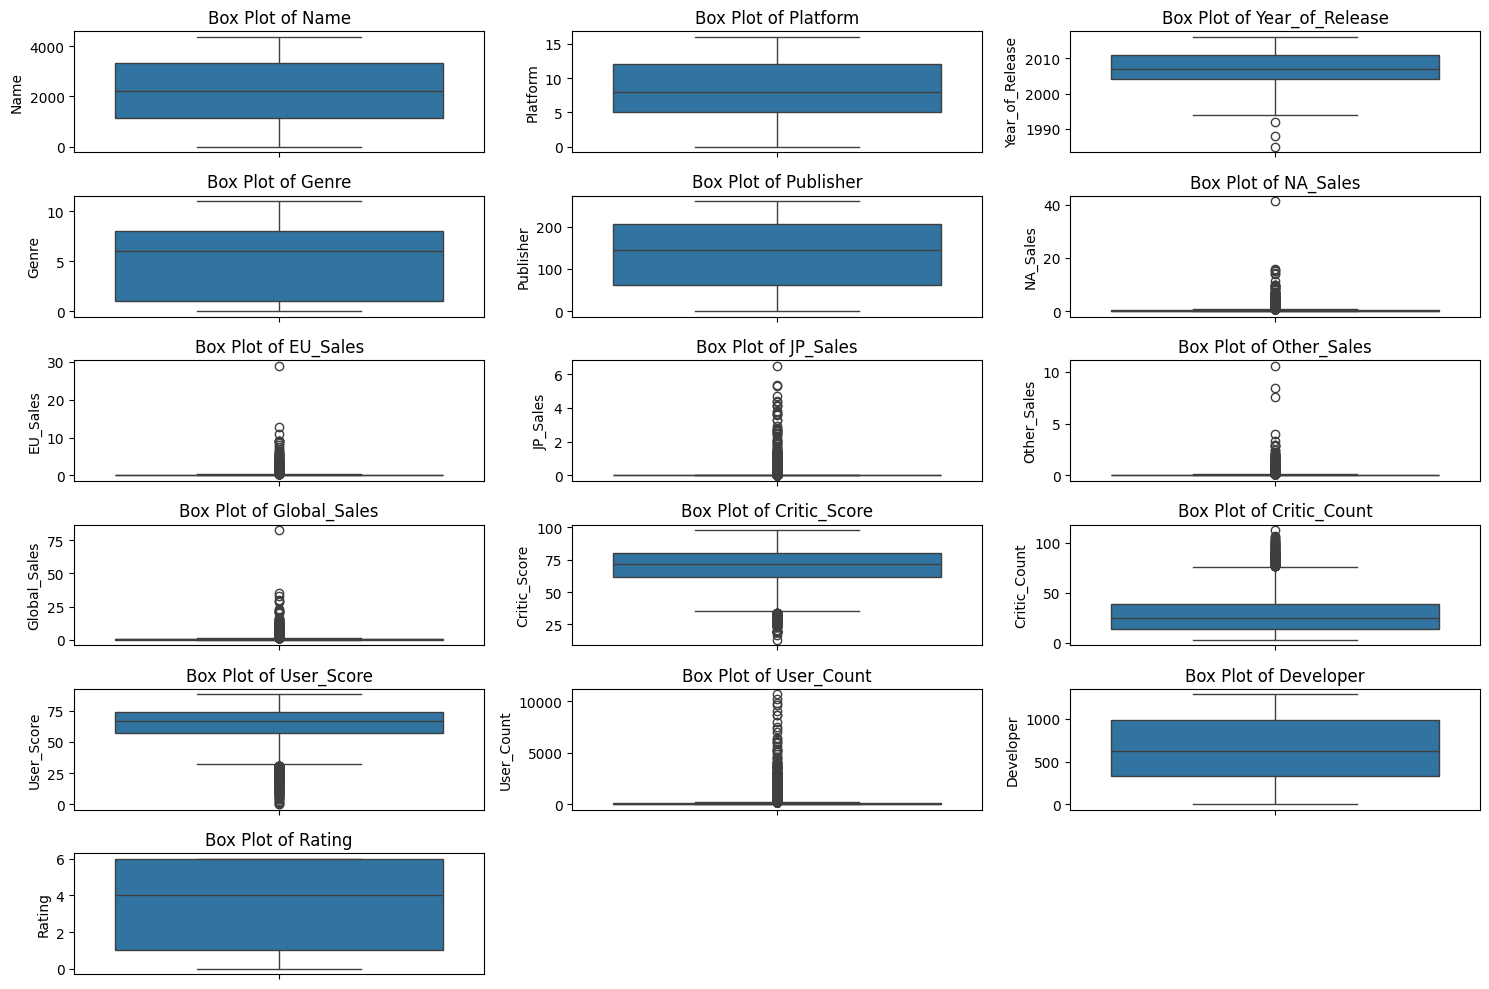

In [11]:
# Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [12]:
df_zscore = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
print(df_zscore)

       Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
144    2189         7           2001.0      0        123      2.45      2.01   
146    2188         6           1998.0      0        123      3.18      1.83   
156     624         2           2006.0      9          4      3.07      1.91   
159     191         8           2009.0      0        237      2.54      1.93   
160     188        14           2007.0      1        237      3.28      1.64   
...     ...       ...              ...    ...        ...       ...       ...   
16656  1229        13           2016.0      0        160      0.00      0.01   
16677  2297         3           2002.0      2        146      0.01      0.00   
16696  2194         5           2014.0      0        123      0.00      0.01   
16700   407         5           2011.0      8         53      0.01      0.00   
16706  3094         5           2011.0     11        240      0.00      0.01   

       JP_Sales  Other_Sales  Global_Sa

In [13]:
 # Using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_iqr

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1357,3885,12,2008.0,10,61,0.80,0.47,0.00,0.14,1.42,81.0,18.0,79,34.0,349,1
1366,3342,14,2009.0,3,196,0.85,0.43,0.00,0.13,1.41,79.0,45.0,77,40.0,111,2
1412,478,12,2010.0,8,11,0.80,0.45,0.00,0.12,1.37,80.0,25.0,50,87.0,1165,4
1419,3919,15,2004.0,8,237,0.86,0.45,0.00,0.06,1.36,80.0,53.0,81,58.0,910,6
1432,1411,2,2009.0,5,4,0.79,0.42,0.01,0.13,1.35,60.0,17.0,85,4.0,1102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16634,3590,16,2016.0,6,147,0.00,0.01,0.00,0.00,0.01,63.0,8.0,74,22.0,710,1
16656,1229,13,2016.0,0,160,0.00,0.01,0.00,0.00,0.01,81.0,46.0,77,151.0,1005,1
16677,2297,3,2002.0,2,146,0.01,0.00,0.00,0.00,0.01,81.0,12.0,80,9.0,260,4
16700,407,5,2011.0,8,53,0.01,0.00,0.00,0.00,0.01,61.0,12.0,50,43.0,99,6


In [14]:
df_standard = df_iqr.copy()
scaler_standard = StandardScaler()
df_standard[numeric_cols] = scaler_standard.fit_transform(df_standard[numeric_cols])

# Now you can print or display the df_standard DataFrame
print(df_standard.head())


          Name  Platform  Year_of_Release     Genre  Publisher  NA_Sales  \
1357  1.291028  0.693703         0.319367  1.247587  -0.781016  3.433343   
1366  0.860182  1.147465         0.576571 -0.551811   0.822849  3.710669   
1412 -1.412273  0.693703         0.833775  0.733473  -1.375040  3.433343   
1419  1.318006  1.374345        -0.709449  0.733473   1.309948  3.766134   
1432 -0.671980 -1.575104         0.576571 -0.037697  -1.458204  3.377878   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
1357  3.910181 -0.270187     3.515501      4.156931      1.064573   
1366  3.509558 -0.270187     3.204832      4.120182      0.900939   
1412  3.709870 -0.270187     2.894162      3.973186      0.982756   
1419  3.709870 -0.270187     1.030144      3.936438      0.982756   
1432  3.409402  2.279822     3.204832      3.899689     -0.653580   

      Critic_Count  User_Score  User_Count  Developer    Rating  
1357     -0.395867    1.234438    0.101242  -0.767527 -1.10536

In [15]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])
df_minmax

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0.963208,0.7500,0.677419,0.909091,0.613027,1.000000,1.000000,0.580000,0.799432,1.000000,0.741176,0.436364,0.818182,0.029828,0.598602,0.166667
2,0.476920,0.7500,0.741935,0.545455,0.613027,0.379110,0.440608,0.583077,0.311258,0.430320,0.811765,0.636364,0.852273,0.066129,0.598602,0.166667
3,0.963665,0.7500,0.774194,0.909091,0.613027,0.377418,0.377417,0.504615,0.279092,0.396995,0.788235,0.636364,0.818182,0.017634,0.598602,0.166667
6,0.586609,0.1250,0.677419,0.363636,0.613027,0.272727,0.315608,1.000000,0.272469,0.361003,0.894118,0.563636,0.875000,0.040053,0.598602,0.166667
7,0.962751,0.7500,0.677419,0.272727,0.613027,0.337524,0.316989,0.450769,0.268685,0.350339,0.529412,0.345455,0.659091,0.011725,0.598602,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0.239488,0.1875,0.516129,0.000000,0.605364,0.000242,0.000000,0.000000,0.000000,0.000000,0.388235,0.009091,0.181818,0.001595,0.319099,0.166667
16677,0.524909,0.1875,0.548387,0.181818,0.559387,0.000242,0.000000,0.000000,0.000000,0.000000,0.800000,0.081818,0.909091,0.000469,0.201863,0.666667
16696,0.501371,0.3125,0.935484,0.000000,0.471264,0.000000,0.000345,0.000000,0.000000,0.000000,0.788235,0.154545,0.772727,0.038270,0.479037,0.666667
16700,0.093007,0.3125,0.838710,0.727273,0.203065,0.000242,0.000000,0.000000,0.000000,0.000000,0.564706,0.081818,0.568182,0.003658,0.076863,1.000000


In [16]:
# Replace 'tbd' with NaN
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
# Convert to float
df['User_Score'] = pd.to_numeric(df['User_Score'])


In [17]:
df = df.dropna(subset=['User_Score'])

In [18]:
print(df['User_Score'])

0        72
2        75
3        72
6        77
7        58
         ..
16667    16
16677    80
16696    68
16700    50
16706    64
Name: User_Score, Length: 6825, dtype: int64


In [19]:
# One-liner preprocessing
df_clean = df.replace('tbd', np.nan).assign(User_Score=lambda x: pd.to_numeric(x['User_Score'])).dropna(subset=['User_Score'])
df_clean = df_clean[(np.abs(zscore(df_clean.select_dtypes(include=['int64', 'float64']))) < 3).all(axis=1)]
# Print the cleaned DataFrame
print("Preprocessed Dataset:")
print(df_clean.head())  

Preprocessed Dataset:
     Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
144  2189         7           2001.0      0        123      2.45      2.01   
146  2188         6           1998.0      0        123      3.18      1.83   
156   624         2           2006.0      9          4      3.07      1.91   
159   191         8           2009.0      0        237      2.54      1.93   
160   188        14           2007.0      1        237      3.28      1.64   

     JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
144      0.87         0.72          6.05          96.0          42.0   
146      0.78         0.24          6.03          94.0          20.0   
156      0.07         0.57          5.63          67.0          35.0   
159      0.21         0.86          5.55          91.0          70.0   
160      0.07         0.56          5.54          81.0          77.0   

     User_Score  User_Count  Developer  Rating  
144          79      1026.0

In [20]:
print("Shape after preprocessing:", df_clean.shape)

Shape after preprocessing: (6399, 16)


Genre
0     1630
10     943
8      864
7      712
6      581
4      403
3      384
2      378
9      297
11     267
1      248
5      118
Name: count, dtype: int64


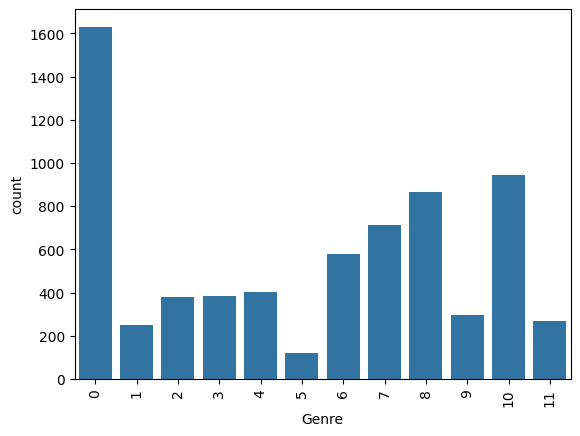

In [21]:
target_column = 'Genre' 

if target_column in df.columns:
    print(df[target_column].value_counts())
    sns.countplot(x=target_column, data=df)
    plt.xticks(rotation=90)
    plt.show()
else:
    print(f"Column '{target_column}' not found.")


## 2.	Apply any two unsupervised learning techniques**

1. **KMeans**
2. **Hierarchical** **Clustering**

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

In [ ]:
# Select numeric features for clustering 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].dropna()

In [24]:
# 1. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [25]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

In [26]:
# Cluster validation
print("K-Means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("K-Means Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
print("Agglomerative Silhouette Score:", silhouette_score(X, agglo_labels))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X, agglo_labels))

K-Means Silhouette Score: 0.41606256745042003
K-Means Davies-Bouldin Index: 0.853720145614517
Agglomerative Silhouette Score: 0.3617170147589294
Agglomerative Davies-Bouldin Index: 0.8944871136961142


In [27]:
# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Step 5: Find optimal k using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


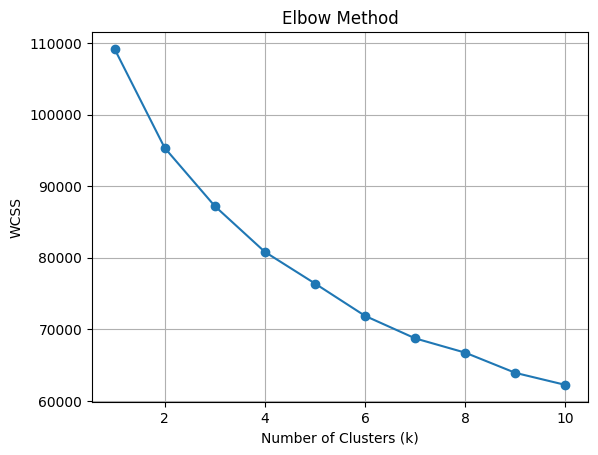

In [29]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [30]:
# Step 6: Check Silhouette Scores
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.596
Silhouette Score for k=3: 0.094
Silhouette Score for k=4: 0.097
Silhouette Score for k=5: 0.098
Silhouette Score for k=6: 0.094
Silhouette Score for k=7: 0.090
Silhouette Score for k=8: 0.089
Silhouette Score for k=9: 0.090
Silhouette Score for k=10: 0.089


In [32]:
# Step 7: Apply KMeans with optimal k (e.g., k=3)
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [33]:
# Step 8: Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

In [34]:
print("\nCluster Labels:", kmeans.labels_)
print("Centroids (scaled):\n", kmeans.cluster_centers_)
print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")


Cluster Labels: [2 2 2 ... 0 1 1]
Centroids (scaled):
 [[ 7.68310154e-02  2.77371506e-03 -1.39234793e-01  1.82296558e-01
   5.42172831e-02  5.98480394e-02  3.94060872e-02  1.88802444e-02
   2.79648117e-02  4.98800590e-02  5.84204172e-01  3.63236967e-01
   5.13758490e-01  9.08860232e-02  4.99418361e-02  5.64122084e-02]
 [-9.35688354e-02 -4.47100666e-03  1.76518030e-01 -2.46407923e-01
  -7.42382765e-02 -2.41900940e-01 -2.25102545e-01 -1.67879305e-01
  -1.94332946e-01 -2.49258911e-01 -8.18818844e-01 -5.38619867e-01
  -6.92989710e-01 -2.16823627e-01 -7.00719349e-02 -6.99259203e-02]
 [-2.88875688e-01  2.41878107e-02  3.03378666e-01  8.72669439e-02
   5.61509708e-02  5.12773473e+00  5.46102512e+00  4.51759841e+00
   4.97084722e+00  5.78270544e+00  1.20309272e+00  1.68256770e+00
   1.99985060e-01  3.01970035e+00  1.05179823e-01 -1.73333233e-01]]
Inertia (WCSS): 87231.18


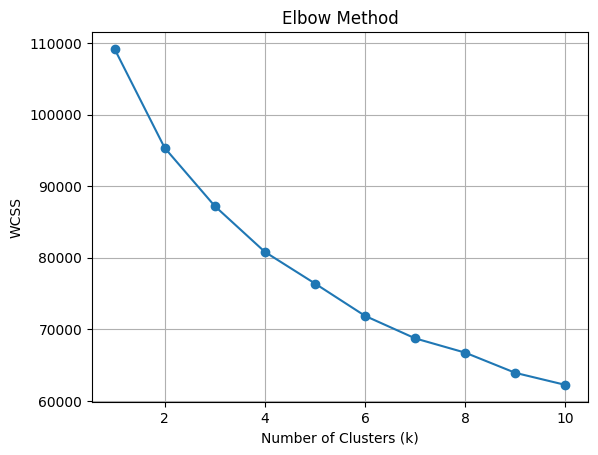

Silhouette Score for k=2: 0.596
Silhouette Score for k=3: 0.094
Silhouette Score for k=4: 0.097
Silhouette Score for k=5: 0.098
Silhouette Score for k=6: 0.094
Silhouette Score for k=7: 0.090
Silhouette Score for k=8: 0.089
Silhouette Score for k=9: 0.090
Silhouette Score for k=10: 0.089

Cluster Labels: [2 2 2 ... 0 1 1]
Centroids (scaled):
 [[ 7.68310154e-02  2.77371506e-03 -1.39234793e-01  1.82296558e-01
   5.42172831e-02  5.98480394e-02  3.94060872e-02  1.88802444e-02
   2.79648117e-02  4.98800590e-02  5.84204172e-01  3.63236967e-01
   5.13758490e-01  9.08860232e-02  4.99418361e-02  5.64122084e-02]
 [-9.35688354e-02 -4.47100666e-03  1.76518030e-01 -2.46407923e-01
  -7.42382765e-02 -2.41900940e-01 -2.25102545e-01 -1.67879305e-01
  -1.94332946e-01 -2.49258911e-01 -8.18818844e-01 -5.38619867e-01
  -6.92989710e-01 -2.16823627e-01 -7.00719349e-02 -6.99259203e-02]
 [-2.88875688e-01  2.41878107e-02  3.03378666e-01  8.72669439e-02
   5.61509708e-02  5.12773473e+00  5.46102512e+00  4.517598

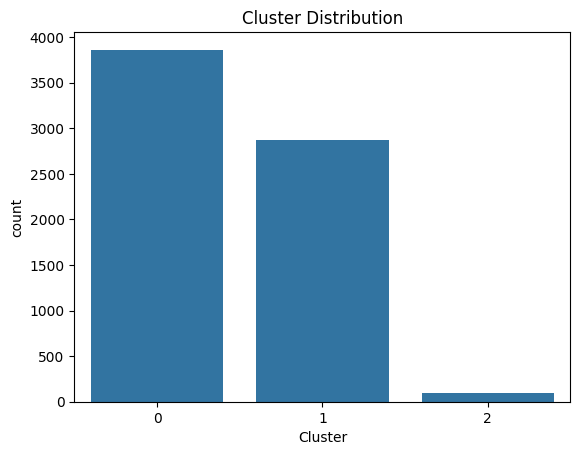

In [ ]:
# Step 10:View cluster distribution
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [36]:
# Select numeric features
X = df.select_dtypes(include=['int64', 'float64']).dropna()

In [37]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Plot dendrogram to decide number of clusters
linked = linkage(X_scaled, method='ward')

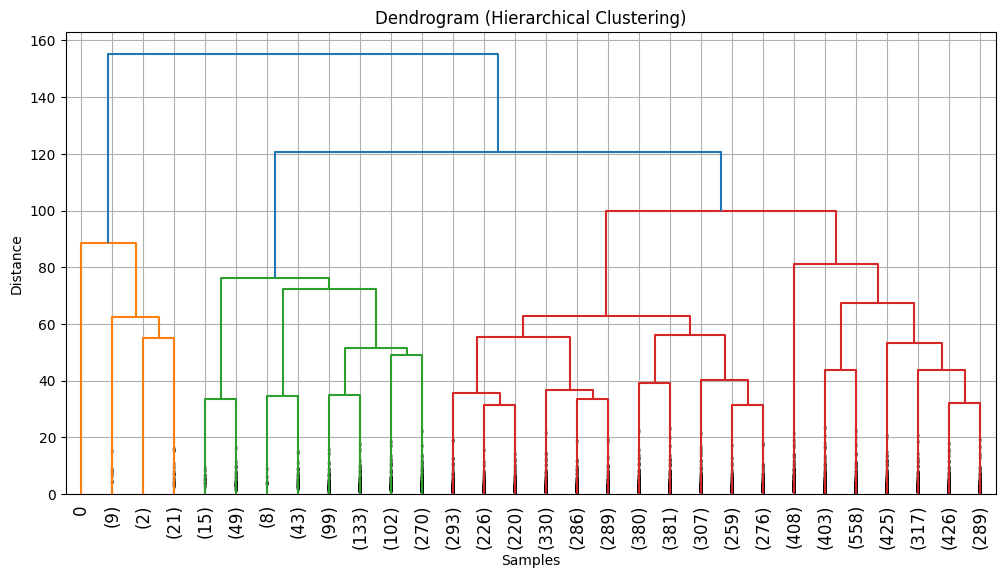

In [39]:
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [40]:
#Apply Agglomerative Clustering
n_clusters = 3  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

In [41]:
#Add cluster labels to original DataFrame
df['Cluster_HC'] = labels

In [42]:
#cluster distribution
print(df['Cluster_HC'].value_counts())

Cluster_HC
0    6073
2     719
1      33
Name: count, dtype: int64


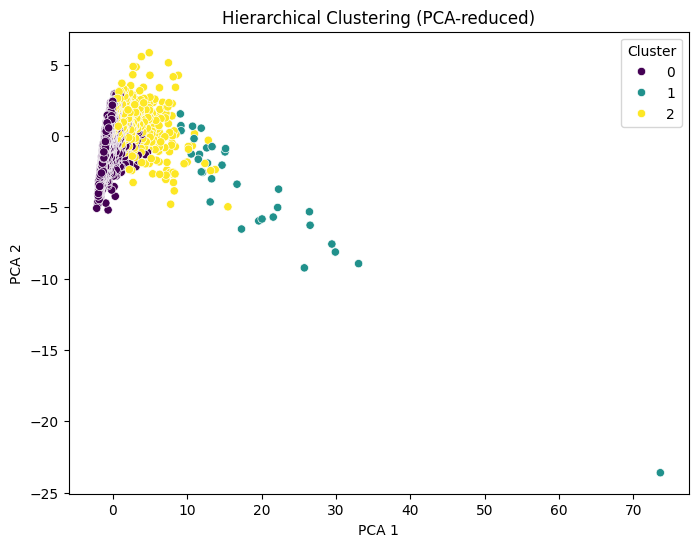

In [43]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


# 3. RFE with a logistic regression model

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
X = df.drop(columns=['Genre'])  
y = df['Genre'] 

In [46]:
model = LogisticRegression(max_iter=500)

In [47]:
# Initialize RFE to select top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=5)

In [48]:
# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Cluster'], dtype='object')


In [49]:
# Use these features for further experiments
df_selected = df[selected_features.to_list() + ['Genre']]

# 4. Imbalance Learning Techniques

**Random** **Oversampling** (**ROS**)

In [51]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Class distribution after ROS:", Counter(y_train_ros))

Class distribution after ROS: Counter({0: 1304, 2: 1304, 8: 1304, 4: 1304, 7: 1304, 9: 1304, 3: 1304, 1: 1304, 6: 1304, 10: 1304, 5: 1304, 11: 1304})


**SMOTE** (Synt**h**etic **Minority** **Oversampling** **Technique**)

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 1304, 2: 1304, 8: 1304, 4: 1304, 7: 1304, 9: 1304, 3: 1304, 1: 1304, 6: 1304, 10: 1304, 5: 1304, 11: 1304})


# 5. **Five** su**p**ervised **learning** **classifiers**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [58]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.p

--- Logistic Regression ---
Accuracy: 0.32234432234432236
              precision    recall  f1-score   support

           0       0.29      0.77      0.42       328
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        69
           3       0.33      0.01      0.03        71
           4       0.33      0.03      0.05        76
           5       0.00      0.00      0.00        25
           6       0.20      0.01      0.02       119
           7       0.32      0.17      0.22       142
           8       0.39      0.16      0.23       180
           9       0.00      0.00      0.00        54
          10       0.39      0.66      0.49       200
          11       0.00      0.00      0.00        54

    accuracy                           0.32      1365
   macro avg       0.19      0.15      0.12      1365
weighted avg       0.27      0.32      0.23      1365


--- Decision Tree ---
Accuracy: 0.47619047619047616
              precisio

c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.6644688644688644
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       328
           1       0.40      0.17      0.24        47
           2       0.75      0.61      0.67        69
           3       0.65      0.51      0.57        71
           4       0.56      0.57      0.56        76
           5       0.50      0.16      0.24        25
           6       0.72      0.54      0.62       119
           7       0.61      0.66      0.64       142
           8       0.67      0.74      0.70       180
           9       0.65      0.41      0.50        54
          10       0.81      0.86      0.84       200
          11       0.66      0.39      0.49        54

    accuracy                           0.66      1365
   macro avg       0.63      0.54      0.56      1365
weighted avg       0.66      0.66      0.65      1365




In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.36336996336996336


In [63]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.4153846153846154


In [64]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Random Forest doesn't need scaled data
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.5758241758241758


 Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [66]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [67]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [68]:
y_pred_gbc = gbc.predict(X_test)

In [69]:
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gbc))


Gradient Boosting Classifier Accuracy: 0.5904761904761905


Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [71]:
dtc = DecisionTreeClassifier(random_state=42)

In [72]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_dtc = dtc.predict(X_test)

In [74]:
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dtc))


Decision Tree Classifier Accuracy: 0.4901098901098901


# 6. Accuracy, precision, recall, f1-sore, classification report, and confusion matrix

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name} ")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Performance Metrics for Logistic Regression 
Accuracy: 0.3634
Precision: 0.3310
Recall: 0.3634
F1-Score: 0.3062

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       328
           1       0.00      0.00      0.00        47
           2       0.39      0.10      0.16        69
           3       0.50      0.08      0.14        71
           4       0.23      0.11      0.14        76
           5       0.00      0.00      0.00        25
           6       0.23      0.08      0.12       119
           7       0.31      0.25      0.28       142
           8       0.31      0.26      0.28       180
           9       0.33      0.04      0.07        54
          10       0.45      0.76      0.56       200
          11       0.36      0.15      0.21        54

    accuracy                           0.36      1365
   macro avg       0.29      0.21      0.20      1365
weighted avg       0.33      0.36      0.31      136

c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

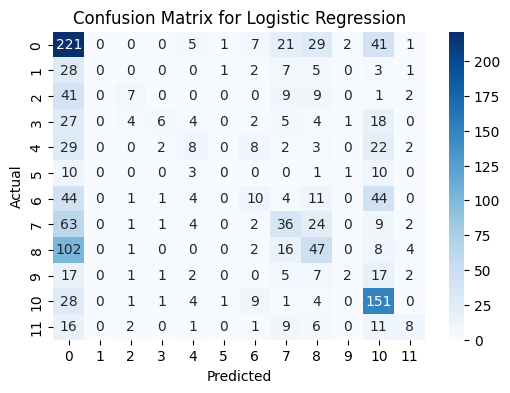

In [83]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Performance Metrics for Support Vector Machine 
Accuracy: 0.4154
Precision: 0.4034
Recall: 0.4154
F1-Score: 0.3514

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.78      0.52       328
           1       0.00      0.00      0.00        47
           2       0.57      0.19      0.28        69
           3       0.33      0.03      0.05        71
           4       0.31      0.17      0.22        76
           5       0.00      0.00      0.00        25
           6       0.28      0.10      0.15       119
           7       0.36      0.31      0.33       142
           8       0.43      0.41      0.42       180
           9       0.67      0.04      0.07        54
          10       0.52      0.74      0.61       200
          11       0.67      0.04      0.07        54

    accuracy                           0.42      1365
   macro avg       0.38      0.23      0.23      1365
weighted avg       0.40      0.42      0.35      

c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

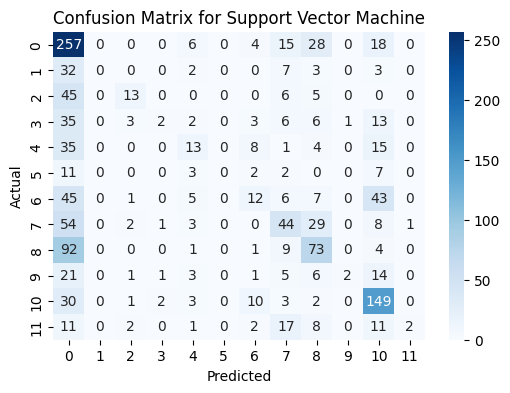

In [85]:
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

Performance Metrics for Random Forest 
Accuracy: 0.5758
Precision: 0.5885
Recall: 0.5758
F1-Score: 0.5540

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.75      0.60       328
           1       0.50      0.06      0.11        47
           2       0.79      0.39      0.52        69
           3       0.62      0.39      0.48        71
           4       0.60      0.49      0.54        76
           5       0.50      0.20      0.29        25
           6       0.60      0.41      0.49       119
           7       0.54      0.51      0.52       142
           8       0.59      0.66      0.62       180
           9       0.67      0.22      0.33        54
          10       0.69      0.86      0.76       200
          11       0.59      0.30      0.40        54

    accuracy                           0.58      1365
   macro avg       0.60      0.44      0.47      1365
weighted avg       0.59      0.58      0.55      1365



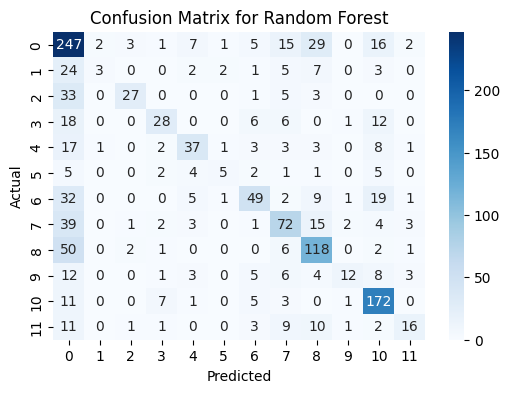

In [86]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

Performance Metrics for Gradient Boosting Classifier 
Accuracy: 0.5905
Precision: 0.5918
Recall: 0.5905
F1-Score: 0.5765

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.62       328
           1       0.39      0.15      0.22        47
           2       0.79      0.59      0.68        69
           3       0.53      0.34      0.41        71
           4       0.46      0.42      0.44        76
           5       0.36      0.20      0.26        25
           6       0.74      0.51      0.61       119
           7       0.56      0.54      0.55       142
           8       0.63      0.58      0.61       180
           9       0.54      0.26      0.35        54
          10       0.69      0.86      0.77       200
          11       0.61      0.43      0.50        54

    accuracy                           0.59      1365
   macro avg       0.57      0.47      0.50      1365
weighted avg       0.59      0.59      0.58

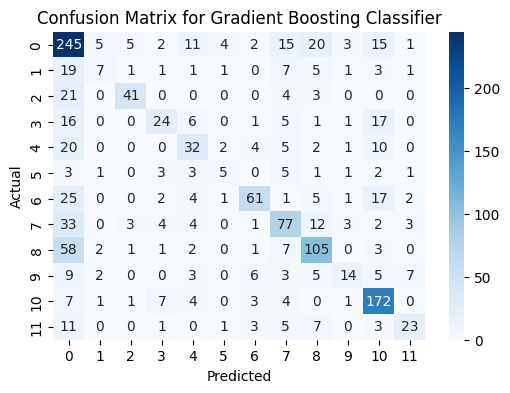

In [87]:
evaluate_model(y_test, y_pred_gbc, "Gradient Boosting Classifier")

Performance Metrics for Decision Tree Classifier 
Accuracy: 0.4901
Precision: 0.4891
Recall: 0.4901
F1-Score: 0.4886

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       328
           1       0.19      0.19      0.19        47
           2       0.54      0.49      0.52        69
           3       0.40      0.41      0.41        71
           4       0.42      0.46      0.44        76
           5       0.11      0.12      0.11        25
           6       0.44      0.34      0.39       119
           7       0.44      0.44      0.44       142
           8       0.52      0.54      0.53       180
           9       0.20      0.19      0.19        54
          10       0.71      0.69      0.70       200
          11       0.38      0.33      0.35        54

    accuracy                           0.49      1365
   macro avg       0.41      0.40      0.40      1365
weighted avg       0.49      0.49      0.49    

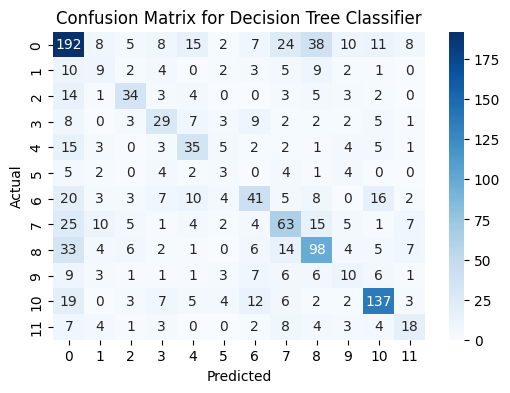

In [88]:
evaluate_model(y_test, y_pred_dtc, "Decision Tree Classifier")

7.DATASET 2

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

  performance  
0        pass  
1        pass  
2        pass  
3        fail  
4        pass  


In [135]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   performance                  1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB
None


In [136]:
#Dropping Unnecessary Columns
X2 = df.drop(columns=['lunch'])
y2 = df['lunch']

In [137]:
#Remove duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [138]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [139]:
#encode categorical variables
df['gender_encoded'] = le.fit_transform(df['gender'])
print(df[['gender_encoded']])

     gender_encoded
0                 0
1                 0
2                 0
3                 1
4                 1
..              ...
995               0
996               1
997               0
998               0
999               0

[1000 rows x 1 columns]


In [140]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [141]:
#Identify numeric columns
numeric_cols_2 = df.select_dtypes(include=['int64', 'float64']).columns

In [142]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols_2] = scaler_minmax.fit_transform(df[numeric_cols_2])
df_minmax


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance,gender_encoded
0,0.0,0.25,0.2,1.0,1.0,0.72,0.662651,0.711111,1.0,0.0
1,0.0,0.50,0.8,1.0,0.0,0.69,0.879518,0.866667,1.0,0.0
2,0.0,0.25,0.6,1.0,1.0,0.90,0.939759,0.922222,1.0,0.0
3,1.0,0.00,0.0,0.0,1.0,0.47,0.481928,0.377778,0.0,1.0
4,1.0,0.50,0.8,1.0,1.0,0.76,0.734940,0.722222,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.00,0.6,1.0,0.0,0.88,0.987952,0.944444,1.0,0.0
996,1.0,0.50,0.4,0.0,1.0,0.62,0.457831,0.500000,1.0,1.0
997,0.0,0.50,0.4,0.0,0.0,0.59,0.650602,0.611111,1.0,0.0
998,0.0,0.75,0.8,1.0,0.0,0.68,0.734940,0.744444,1.0,0.0


In [143]:
df_zscore = df[(np.abs(zscore(df[numeric_cols_2])) < 3).all(axis=1)]

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after removing outliers (Z-score > 3): {df_zscore.shape}")


Shape before outlier removal: (1000, 10)
Shape after removing outliers (Z-score > 3): (969, 10)


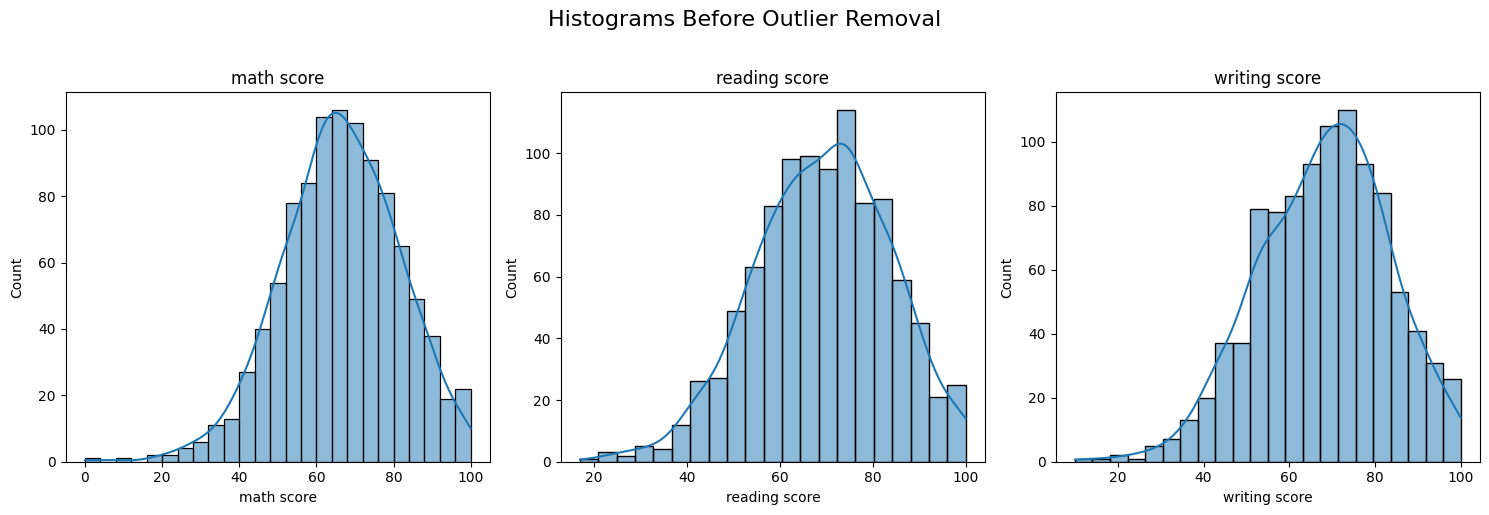

In [144]:
visual = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 5))
plt.suptitle('Histograms Before Outlier Removal', y=1.02, fontsize=16)
for i, col in enumerate(visual):
    plt.subplot(1, len(visual), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


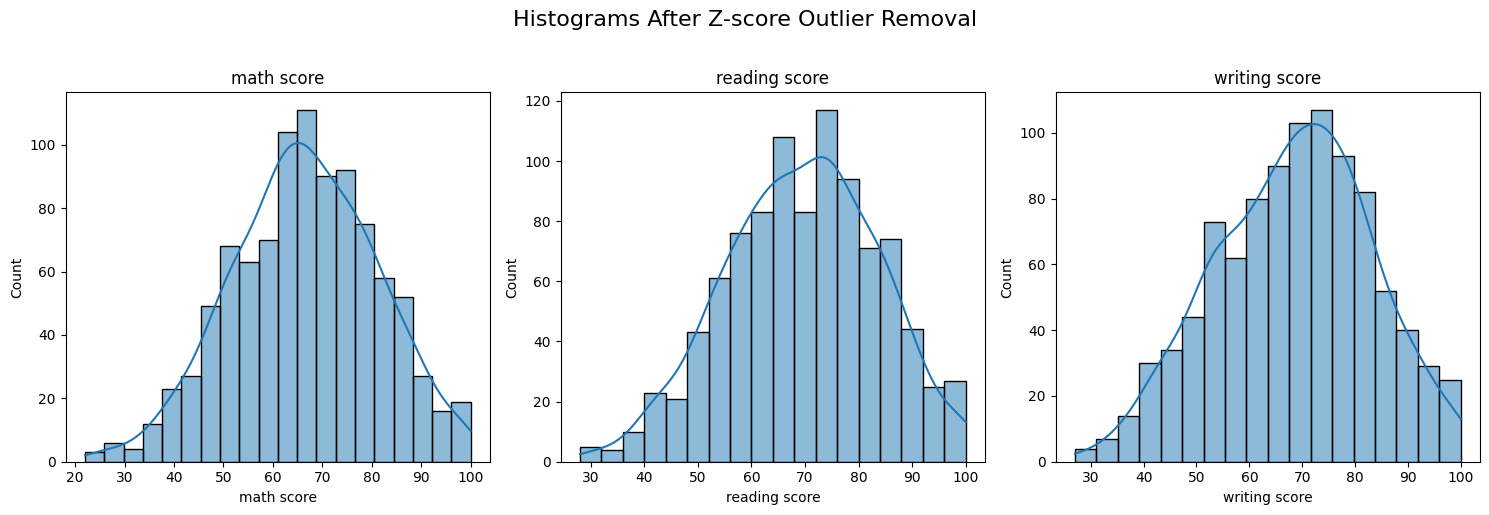

In [145]:
plt.figure(figsize=(15, 5))
plt.suptitle('Histograms After Z-score Outlier Removal', y=1.02, fontsize=16)
for i, col in enumerate(visual):
    plt.subplot(1, len(visual), i + 1)
    sns.histplot(df_zscore[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [146]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance,gender_encoded
0,0,1,1,1,1,72,72,74,1,0
1,0,2,4,1,0,69,90,88,1,0
2,0,1,3,1,1,90,95,93,1,0
3,1,0,0,0,1,47,57,44,0,1
4,1,2,4,1,1,76,78,75,1,1


## 2. Apply any two unsupervised learning techniques (even if the data is labeled) along with clustering validation techniques to ensure the validity of clusters.

In [147]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [149]:
numeric_cols_2 = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
                  'test preparation course', 'math score', 'reading score', 'writing score']

In [150]:
X_clustering_2 = df[numeric_cols_2].copy()


In [151]:
scaler_clustering_2 = StandardScaler()
X_scaled_clustering_2 = scaler_clustering_2.fit_transform(X_clustering_2)
wcss_2 = []
for k in range(1, 11):
    kmeans_2 = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for newer sklearn versions
    kmeans_2.fit(X_scaled_clustering_2)
    wcss_2.append(kmeans_2.inertia_)


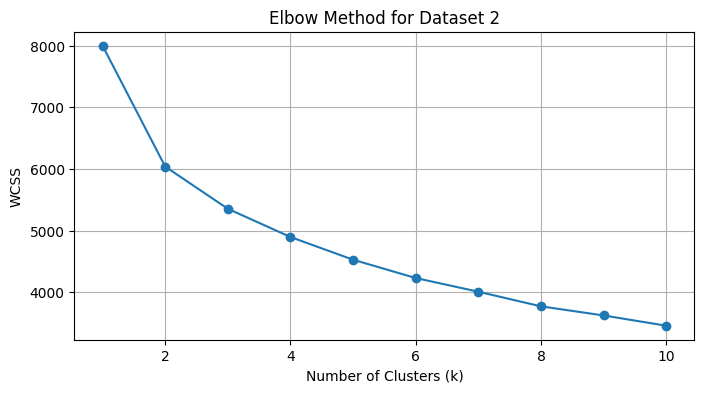

In [152]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss_2, marker='o')
plt.title('Elbow Method for Dataset 2')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [153]:
print("Silhouette Scores for K-Means on Dataset 2:")
for k in range(2, 11):
    kmeans_2 = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_2 = kmeans_2.fit_predict(X_scaled_clustering_2)
    score_2 = silhouette_score(X_scaled_clustering_2, labels_2)
    print(f"Silhouette Score for k={k}: {score_2:.3f}")

Silhouette Scores for K-Means on Dataset 2:
Silhouette Score for k=2: 0.210
Silhouette Score for k=3: 0.174
Silhouette Score for k=4: 0.162
Silhouette Score for k=5: 0.167
Silhouette Score for k=6: 0.179
Silhouette Score for k=7: 0.178
Silhouette Score for k=8: 0.187
Silhouette Score for k=9: 0.184
Silhouette Score for k=10: 0.187


In [154]:
optimal_k_2 = 3
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42, n_init=10)
kmeans_labels_2 = kmeans_2.fit_predict(X_scaled_clustering_2)

In [155]:
print(f"\nK-Means Validation for k={optimal_k_2} on Dataset 2:")
print("Silhouette Score:", silhouette_score(X_scaled_clustering_2, kmeans_labels_2))


K-Means Validation for k=3 on Dataset 2:
Silhouette Score: 0.1741060445115868


In [156]:
# Add K-Means labels to the original DataFrame 
df['Cluster_KMeans_DS2'] = kmeans_labels_2

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [124]:
X = df.select_dtypes(include=['int64', 'float64']).dropna()

In [158]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

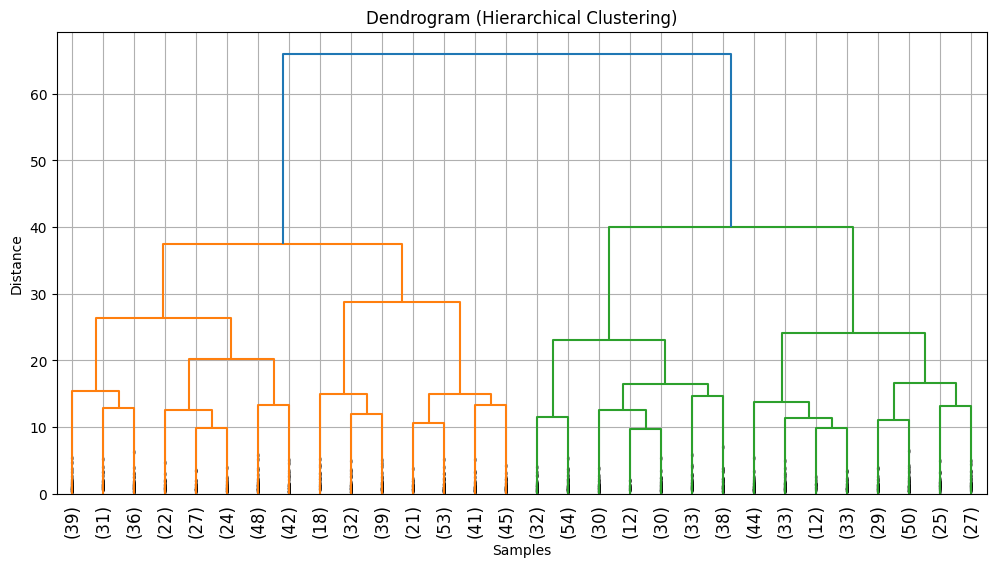

In [159]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [160]:
n_clusters = 3  # Choose based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

In [161]:
#Add cluster labels to original DataFrame
df['Cluster_HC'] = labels

In [162]:
#Print cluster distribution
print(df['Cluster_HC'].value_counts())

Cluster_HC
0    518
1    253
2    229
Name: count, dtype: int64


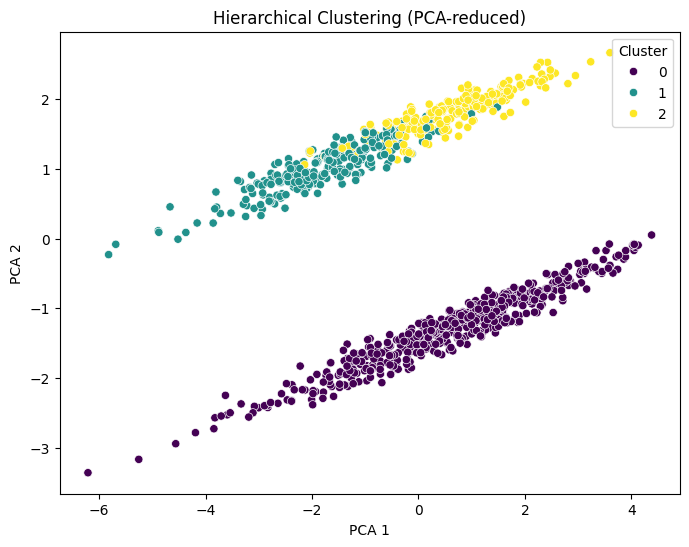

In [163]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title('Hierarchical Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# 3.Apply either of the feature selection techniques. Choose the resultant feature set of any one technique to proceed for the further experiments.  

In [164]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'performance', 'gender_encoded', 'Cluster_KMeans_DS2',
       'Cluster_HC'],
      dtype='object')


In [165]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop("performance", axis=1)
y = df["performance"]

In [167]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

selected_features = X.columns[chi2_selector.get_support()]
X_selected = X[selected_features]

In [168]:
print("Selected features based on Chi-Square:")
print(selected_features)

Selected features based on Chi-Square:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'gender_encoded', 'Cluster_KMeans_DS2', 'Cluster_HC'],
      dtype='object')


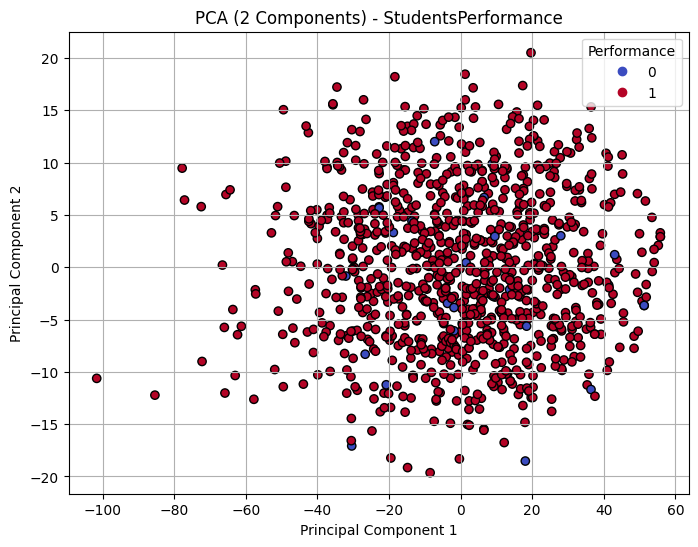

In [198]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", edgecolor='k')
plt.title("PCA (2 Components) - StudentsPerformance")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Performance")
plt.grid(True)
plt.show()

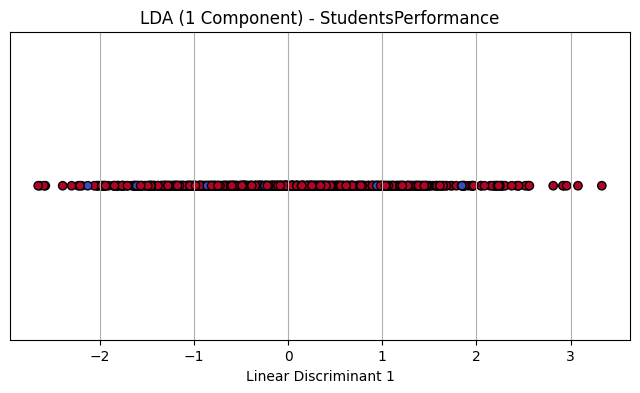

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
plt.figure(figsize=(8, 4))
plt.scatter(X_lda, [0]*len(X_lda), c=y, cmap='coolwarm', edgecolor='k')
plt.title("LDA (1 Component) - StudentsPerformance")
plt.xlabel("Linear Discriminant 1")
plt.yticks([])
plt.grid(True)
plt.show()

# 4. Imbalance Learning Techniques

In [169]:
print(df['performance'].value_counts())
print(df['performance'].value_counts(normalize=True))

performance
1    976
0     24
Name: count, dtype: int64
performance
1    0.976
0    0.024
Name: proportion, dtype: float64


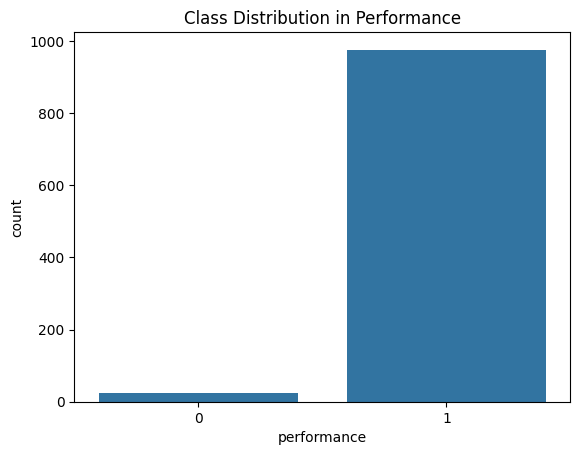

In [170]:
sns.countplot(x='performance', data=df)
plt.title('Class Distribution in Performance')
plt.show()

In [172]:
from imblearn.over_sampling import SMOTE
X = df.drop('performance', axis=1)
y = df['performance']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())


performance
1    976
0    976
Name: count, dtype: int64


In [173]:
balanced_target = pd.Series(y_resampled)
print(balanced_target.value_counts(normalize=True))

performance
1    0.5
0    0.5
Name: proportion, dtype: float64


In [174]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)
print(y_res.value_counts())

performance
1    959
0    959
Name: count, dtype: int64


# 5. **Five** supervised **learning** **classifiers**

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

--- Logistic Regression ---
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200


--- Decision Tree ---
Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      0.98      0.98       197

    accuracy                           0.96       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.97      0.96      0.97       200




c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

--- Random Forest ---
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200




c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

--- Gradient Boosting ---
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200




c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

--- XGBoost ---
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200




c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.985


In [184]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.985


In [185]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.985


Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gbc))

Gradient Boosting Classifier Accuracy: 0.985


In [ ]:
DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dtc))


Decision Tree Classifier Accuracy: 0.99


#6.Illustrate the results of various performance measures (accuracy, precision, recall, f1-sore, classification report, and confusion matrix) for each of the classifiers.

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- Performance Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Performance Metrics for Logistic Regression ---
Accuracy: 0.9850
Precision: 0.9702
Recall: 0.9850
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

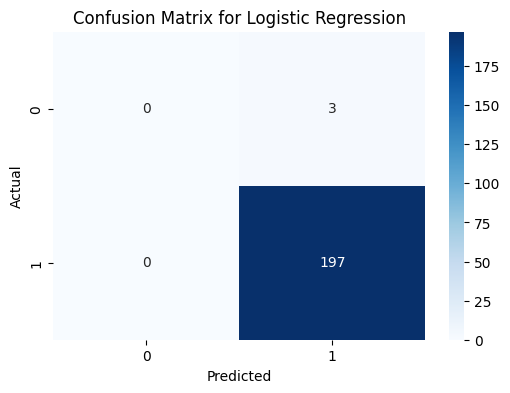

In [189]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


--- Performance Metrics for Support Vector Machine ---
Accuracy: 0.9850
Precision: 0.9702
Recall: 0.9850
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

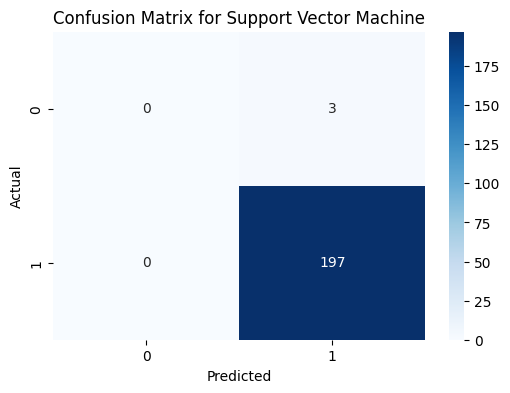

In [190]:
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")


--- Performance Metrics for Random Forest ---
Accuracy: 0.9850
Precision: 0.9702
Recall: 0.9850
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

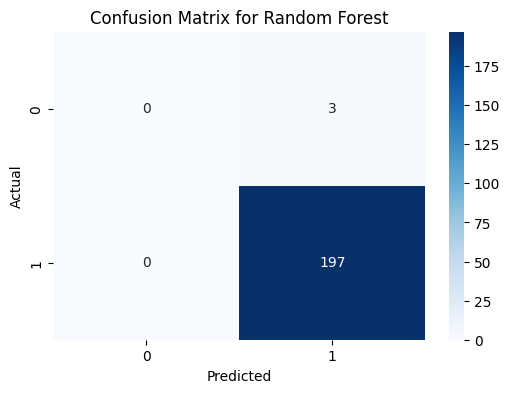

In [191]:
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Performance Metrics for Gradient Boosting Classifier ---
Accuracy: 0.9850
Precision: 0.9702
Recall: 0.9850
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

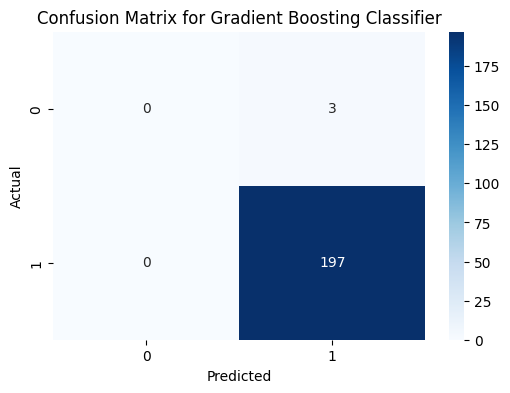

In [192]:
evaluate_model(y_test, y_pred_gbc, "Gradient Boosting Classifier")


--- Performance Metrics for Decision Tree Classifier ---
Accuracy: 0.9850
Precision: 0.9702
Recall: 0.9850
F1-Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       197

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

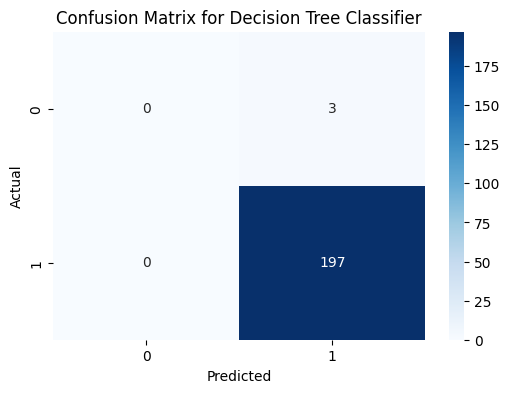

In [ ]:
y_pred_dtc = model.predict(X_test)
evaluate_model(y_test, y_pred_dtc, "Decision Tree Classifier")
